<table style="width:100%">
  <tr>
    <th align="right"><img src="img/dilogo.png" style="float:left;height:90px"></th>
    <th align="center">
    <h1 align="center">Tarea 2</h1>
    <h2 align="center">Profesor: Ricardo Ñanculef</h2>
    <h3 align="center">Ayudante: Fransisco Mena</h3>
    <h3 align="center">Camilo Sanchez Bravo</h3>
    <h3 align="center">201673586-0</h3>
    <h3 align="center">Gabriel Vergara Donoso</h3>
    <h3 align="center">201673605-0</h3>
    <h3 align="center">Noviembre 2019</h3>
    </th> 
    <th align="left"><img src="img/usmlogo.png" style="float:right;height:85px"></th>
  </tr>

## 1. Sentiment Analysis en Texto

In [3]:
import pandas as pd
ftr = open("polarity.train", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in ftr.readlines()]
df_train = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_train['Sentiment'] = (pd.to_numeric(df_train['Sentiment'])+1)/2 # 0 o 1
fts = open("polarity.dev", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in fts.readlines()]
df_test = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_test['Sentiment'] = (pd.to_numeric(df_test['Sentiment'])+1)/2 # 0 o 1
df_train_text = df_train.Text
df_test_text = df_test.Text
labels_train = df_train.Sentiment.values
labels_test = df_test.Sentiment.values

a) Describa los datos trabajados, como la cantidad de datos en cada conjunto, largo de los textos, la cantidad de ejemplo por cada clase, o alguna otra forma que piense que pueda ser útil para comprender el problema trabajado.

In [4]:
df_train.columns

Index(['Sentiment', 'Text'], dtype='object')

In [5]:
import matplotlib.pyplot as plt
import numpy as np
evaluaciones = np.unique(labels_train, return_counts=True)
plt.bar(["Negativas","Positivas"],evaluaciones[1],align="center")
plt.title("Cantidad de evaluaciones negativas y positivas\n(conjunto de entrenamiento)")
plt.show()

<Figure size 640x480 with 1 Axes>

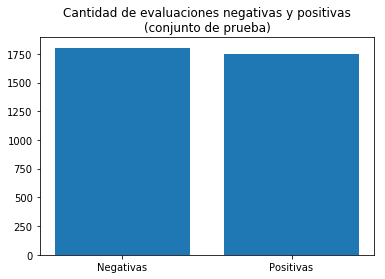

In [6]:
evaluaciones = np.unique(labels_test, return_counts=True)
plt.bar(["Negativas","Positivas"],evaluaciones[1],align="center")
plt.title("Cantidad de evaluaciones negativas y positivas\n(conjunto de prueba)")
plt.show()


En ambos gráficos de barras se muestran la cantidad de opiniones en ambos conjuntos. A simple vista esto nos da información de que ambos conjuntos son similares en cuanto a cantidad de clases (negativas y positivas) con una distribución similar, donde cerca de la mitad son negativos y el resto positivas en ambos casos. Además desde una visión probabilistica, la probabilidad de elegir la clase correcta del comentario sin entrenar el modelo sería alrededor de 0.5, por lo que se esperaría que un modelo que al menos elige la clase al azar tenga una precisión del 0.5.

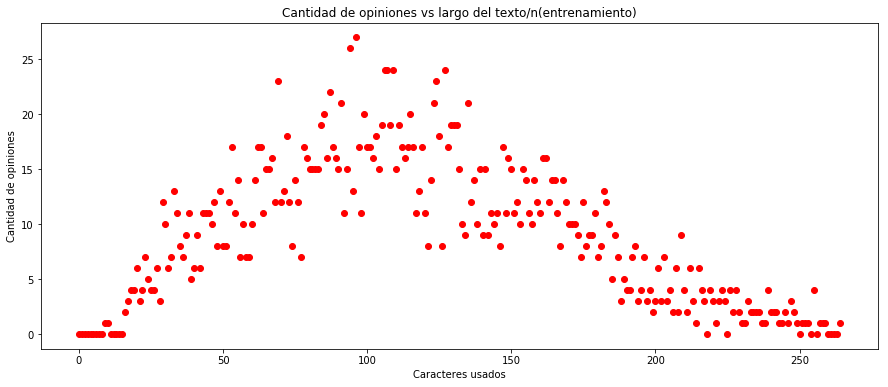

In [108]:
#mayor = 0
#for i in df_train_text.keys():
#    if len(df_train_text[i])>mayor:
#        mayor = len(df_train_text[i])
#print(mayor) ==264
largos = np.zeros(265)
for i in df_train_text.keys():
    largo = len(df_train_text[i])
    largos[largo]+=1
plt.figure(figsize=(15,6))
plt.plot(largos,"ro")
plt.title("Cantidad de opiniones vs largo del texto/n(entrenamiento)")
plt.ylabel("Cantidad de opiniones")
plt.xlabel("Caracteres usados")
plt.show()


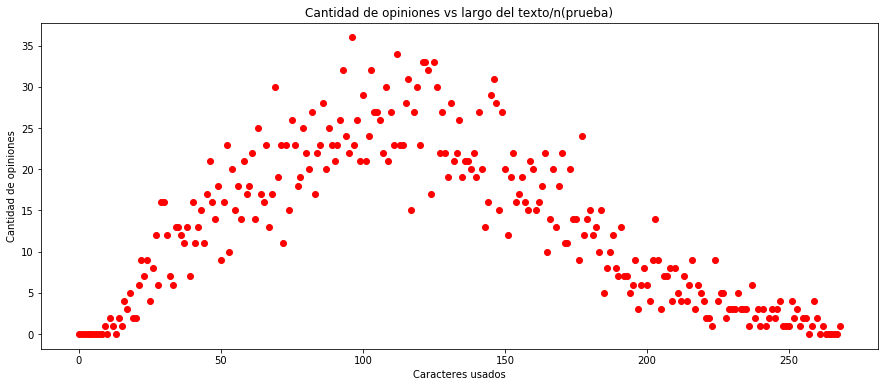

In [8]:
#mayor = 0
#for i in df_test_text.keys():
#    if len(df_test_text[i])>mayor:
#        mayor = len(df_test_text[i])
#print(mayor)==269
largos = np.zeros(269)
for i in df_test_text.keys():
    largo = len(df_test_text[i])
    largos[largo]+=1
plt.figure(figsize=(15,6))
plt.plot(largos,"ro")
plt.title("Cantidad de opiniones vs largo del texto/n(prueba)")
plt.ylabel("Cantidad de opiniones")
plt.xlabel("Caracteres usados")
plt.show()

Se construyeron los gráficos de arriba para comparar el largo de los textos en ambos conjuntos, y verificar si eran similares en cantidad de palabras, y a simple vista así parece, donde la mayoría de los textos tienen entre 10 y 30 palabras. También sirve como un vistazo simple a la cantidad de palabras a procesar, que se podrían esperar miles.

In [9]:
df_test.shape

(3554, 2)

In [10]:
df_train.shape

(3554, 2)

Los dataset contienen 3554 registros diferentes, cada uno con 2 atributos.

b) Construya un conjunto de validación desde el conjunto de entrenamiento para seleccionar modelos. Decida el tamaño dada la cantidad de ejemplos que se tienen para entrenamiento.

In [11]:
from sklearn.model_selection import train_test_split

df_train_text, df_val_text, labels_train, labels_val  = train_test_split(df_train_text, labels_train, test_size= 0.33, random_state = 0)

El tamaño escogido para el conjunto es de 1/3 con respecto al conjunto de entrenamiento

c) Realice un pre-procesamiento a los textos para normalizar un poco su estructura, para ello utilice el código de ejemplo a continuación, donde se pasa el texto a minúsculas (*lower-casing*), se reducen las mútliples letras, se eliminan palabras sin significados como artículos, pronombres y preposiciones (*stop word removal* [[3]](#refs)), además de pasar las palabras a su tronco léxico con la técnica de *lemmatizer* [[4]](#refs). Comente la importancia de un correcto pre-procesamiento en el domino de lenguaje natural.

In [12]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gverg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gverg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gverg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
def base_word(word):
    wordlemmatizer = WordNetLemmatizer()
    return wordlemmatizer.lemmatize(word) 
def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words
#... #try yourself
#word_extractor("I love to eat cake")
#word_extractor("I love eating cake")
#word_extractor("I loved eating the cake")
#word_extractor("I do not love eating cake")
#word_extractor("I don't love eating cake")
#... #try yourself
texts_train = [word_extractor(text) for text in df_train_text]
texts_val = [word_extractor(text) for text in df_val_text]
texts_test = [word_extractor(text) for text in df_test_text]

La importancia del correcto preprocesamiento en el dominio de lenguaje natural está en que es el modo en que la computadora puede reconocer el lenguaje natural humano, es útil para simplificar el texto trabajado por lo que de su correcta implementación depende la eficacia del programa.

d) Construya una representación vectorial a los textos de entrada para poder ser manejados y clasificados por los modelos de aprendizaje. Para ésto utilice el tipo de característica más común, que consiste en contar cuántas veces aparece cada términos/palabras en el texto, denominado **TF** (*term-frequency*). Para esto, se necesita contar con un vocabulario base, el cual se construirá a través de la unión de todas las palabras que observemos en los textos de entrenamiento ¿Cuáles son las palabras más frecuentes?

In [14]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(texts_train)
features_train = vectorizer.transform(texts_train)
... #transform val and test
features_val = vectorizer.transform(texts_val)
features_test = vectorizer.transform(texts_test)
##
vocab = vectorizer.get_feature_names()
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))

In [15]:
ordenado = dist.copy()
ordenado.sort(reverse=True)
ordenado
cantidad = len(dist)
j=0
for i in range(10):
    j=0
    while(j<cantidad):
        if(ordenado[i]==dist[j]):
            print(vocab[j])
            j=cantidad
        j+=1

film
movie
one
ha
like
make
story
character
even
good


Las 10 palabras más comunes son: film, movie, one, ha, like, make, story, character, even, good. Se puede notar que estas son palabras comunes al dar una opinión sobre una película, ya que son usadas para explicar algo sobre estas mismas. Superficialmente estas palabras no dan información sobre si la opinión es negativa o positiva ya que no tienen carga emocional.

e) Para tener una visión distinta y entender mejor la representación vectorial realizada, visualice los datos en un plano 2D. Para ésto utilice la técnica **LSA** (*Latent Semantic Analysis*) [[5]](#refs) que a diferencia de PCA, **no centra** los datos antes de realizar la descomposicipon SVD, de ésta manera podrá visualizar el espacio semántico de "conceptos" latentes usados en la representación. Coloree cada texto en base a su clase ¿Qué indica lo observado? Comente e interprete los resultados

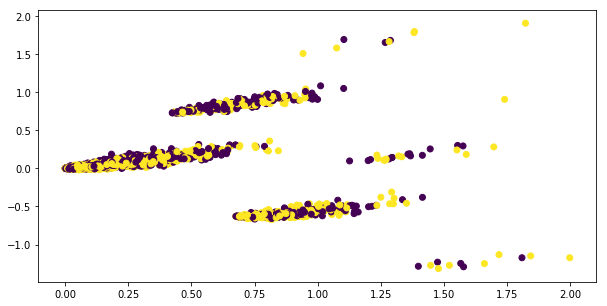

In [16]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
model = TruncatedSVD(n_components=2)
model.fit(features_train)
x_plot = model.transform(features_train)
plt.figure(figsize=(10,5))
plt.scatter(x_plot[:,0], x_plot[:,1], c=labels_train)
plt.show()


Habiendo reducido los atributos a 2 (disminución de dimensionalidad a 2) usando la técnica LSA, para determinar la similitud entre palabras y textos, y así visualizar los datos en 2 dimensiones, se obtuvo el gráfico "Datos en 2 Dimensiones". Habiendo solo dos clases separadas por color, se observa que el atributo del el rótulo 'y' hay grupos donde datos de distintas clases se solapan y en el rótulo 'x' los datos están dispersos también a lo largo. Por lo tanto a simple vista no se puede observar una frontera clara entre textos negativos y positivos al disminuir sus atributos.

f) Entrene un modelo de Regresión Logística Regularizado (utilizando como penalizador la norma $l_2$). Varíe el parámetro de regularización $C$, en potencias de 10, midiendo el error de predicción obtenido sobre los datos de entrenamiento y validación, construya un gráfico que muestre la variación de ambos errores respecto al parámetro $C$. Explique el significado y valor esperado del parámetro de regularización.

C:\Users\gverg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


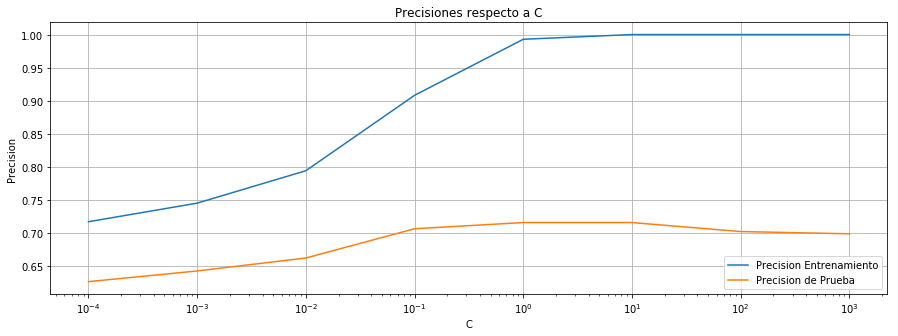

In [17]:
from sklearn.linear_model import LogisticRegression
def do_LOGIT(x,y,xv,yv, param):
    #print("Param C= ",param)
    model= LogisticRegression()
    #model= LogisticRegression(penalty='l2',C=param)
    model.set_params(C=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [10**i for i in np.arange(-4,4,dtype=float)]
ParamC =list()
TrainAcc = list()
TestAcc = list()
for i in Cs:
    model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param= i)
    #print("train_acc: ",train_acc)
    #print("test_acc: ",test_acc)
    ParamC.append(i)
    TrainAcc.append(train_acc)
    TestAcc.append(test_acc)
    
plt.figure(figsize=(15,5))
plt.plot(ParamC, TrainAcc,label="Precision Entrenamiento")
plt.plot(ParamC, TestAcc, label="Precision de Prueba")
plt.xscale('log')
plt.title('Precisiones respecto a C')
plt.legend(loc='lower right')
plt.ylabel("Precision")
plt.xlabel("C")
plt.grid()
plt.show()


El parámetro de regularización determina el grado de "poda" que sufren los coeficientes de la solución no regularizada. La elección de C está guiada por el error de predicción del modelo regualrizado. Se suele utilizar un predictor del error de test y se elige el valor que minimiza la estimación.

g) Entrene una Máquina de Soporte Vectorial (SVM) con distintos kernels. Similar a lo anterior, construya un gráfico que muestre la variación de ambos errores respecto al parámetro de regularización $C$ para cada tipo de kernel que experimente. Explique el significado y valor esperado de los parámetros en este modelo.

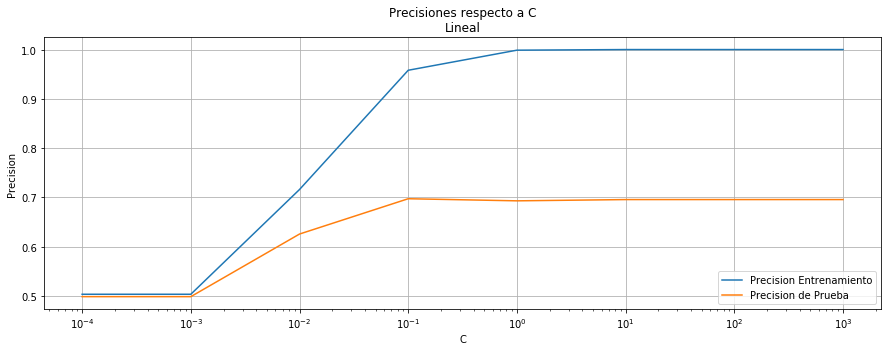

In [18]:
from sklearn.svm import SVC as SVM #SVC is for classification
def do_SVM(x,y,xv,yv, param, kernel='linear'):
    #print("Param C= ",param, 'Kernel= ', kernel)
    model= SVM()
    model.set_params(C=param,kernel=kernel) #try rbf and linear at least
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [10**i for i in np.arange(-4,4,dtype=float)]
ParamC =list()
TrainAcc = list()
TestAcc = list()
for i in Cs:
    model, train_acc, test_acc = do_SVM(features_train,labels_train,features_val,labels_val, param=i)
    #print("train_acc: ",train_acc)
    #print("test_acc: ",test_acc)
    ParamC.append(i)
    TrainAcc.append(train_acc)
    TestAcc.append(test_acc)
    
plt.figure(figsize=(15,5))
plt.plot(ParamC, TrainAcc,label="Precision Entrenamiento")
plt.plot(ParamC, TestAcc, label="Precision de Prueba")
plt.xscale('log')
plt.title('Precisiones respecto a C\nLineal')
plt.legend(loc='lower right')
plt.ylabel("Precision")
plt.xlabel("C")
plt.grid()
plt.show()

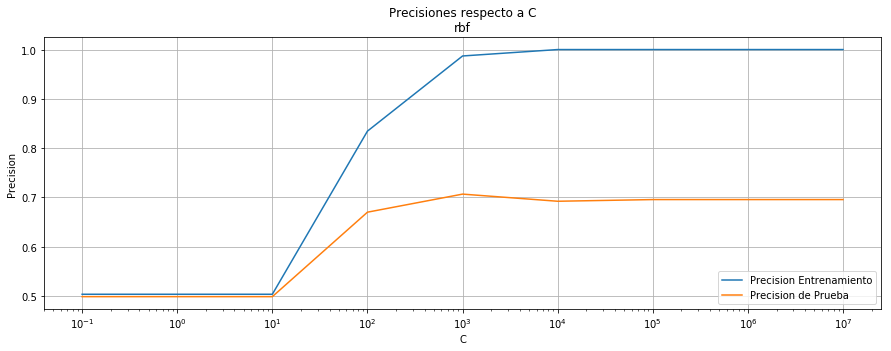

In [29]:
from sklearn.svm import SVC as SVM #SVC is for classification
def do_SVMr(x,y,xv,yv, param, kernel='rbf'):
    #print("Param C= ",param, 'Kernel= ', kernel)
    model= SVM(gamma='auto')
    model.set_params(C=param,kernel=kernel) #try rbf and linear at least
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [10**i for i in np.arange(-1,8,dtype=float)]
ParamC =list()
TrainAcc = list()
TestAcc = list()
for i in Cs:
    model, train_acc, test_acc = do_SVMr(features_train,labels_train,features_val,labels_val, param=i)
    #print("train_acc: ",train_acc)
    #print("test_acc: ",test_acc)
    ParamC.append(i)
    TrainAcc.append(train_acc)
    TestAcc.append(test_acc)
    
plt.figure(figsize=(15,5))
plt.plot(ParamC, TrainAcc,label="Precision Entrenamiento")
plt.plot(ParamC, TestAcc, label="Precision de Prueba")
plt.xscale('log')
plt.title('Precisiones respecto a C\nrbf')
plt.legend(loc='lower right')
plt.ylabel("Precision")
plt.xlabel("C")
plt.grid()
plt.show()

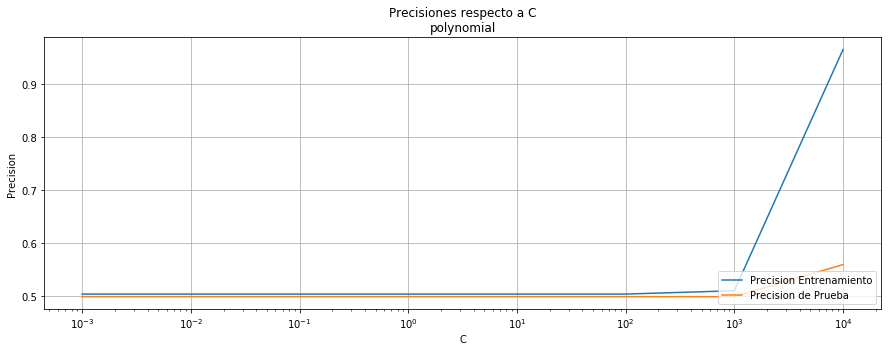

In [30]:
from sklearn.svm import SVC as SVM #SVC is for classification
def do_SVMp(x,y,xv,yv, param, kernel='poly'):
    #print("Param C= ",param, 'Kernel= ', kernel)
    model= SVM(gamma='scale')
    model.set_params(C=param,kernel=kernel) #try rbf and linear at least
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [10**i for i in np.arange(-3,5,dtype=float)]
ParamC =list()
TrainAcc = list()
TestAcc = list()
for i in Cs:
    model, train_acc, test_acc = do_SVMp(features_train,labels_train,features_val,labels_val, param=i)
    #print("train_acc: ",train_acc)
    #print("test_acc: ",test_acc)
    ParamC.append(i)
    TrainAcc.append(train_acc)
    TestAcc.append(test_acc)
    
plt.figure(figsize=(15,5))
plt.plot(ParamC, TrainAcc,label="Precision Entrenamiento")
plt.plot(ParamC, TestAcc, label="Precision de Prueba")
plt.xscale('log')
plt.title('Precisiones respecto a C\npolynomial')
plt.legend(loc='lower right')
plt.ylabel("Precision")
plt.xlabel("C")
plt.grid()
plt.show()

Un valor pequeño de C permite ignorar un gran conjunto de puntos de entrenamiento y enfoca el aprendizaje en la maximización del margen, en cambio un valor grande permite muchas violaciones de las restricciones originales, el enfoque es minimizar el error de entrenamiento. El óptimo de C depende del problema y es elegido usando un estimador del error de predicción. Esto último se observa como iguales valores C en distintos kernels afectan de diferente forma a la SVM como muestran los gráficos, donde se alcanza la máxima precisión en diferentes magnitud de C. Aún así en todos los casos sucede lo esperado, es que desde cierto valor de C se alcance la máxima precisión en el conjunto de entrenamiento, aún cuando esto no es así en el de pruebas que tiene un máximo en lo que parece ser un solo punto en los casos. Finalmente el que tiene mejor precisión alcanzada en el conjunto de prueba es el kernel rbf, aunque es levemente mayor a los otros dos, ya que los 3 están cerca de 0.7.

h) Utilice el algoritmo de similaridad k-NN para intentar resolver el problema. Varíe el parámetro de los vecinos $k$ en un rango que estime conveniente y realice graficos de errores como en las preguntas anteriores. Comente sobre el valor esperado de este parámetro.

In [21]:
features_train.shape

(2381, 7760)

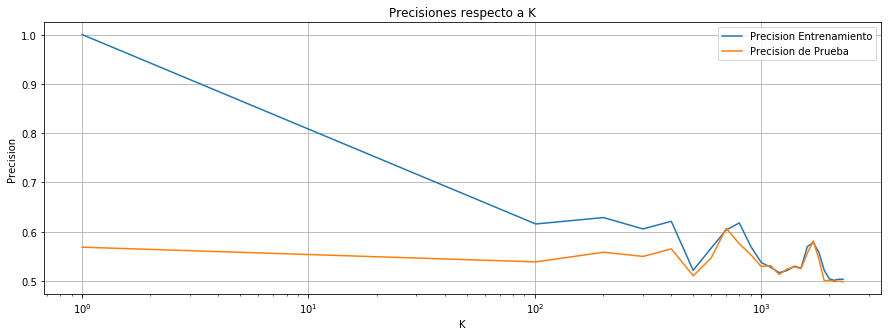

In [22]:
from sklearn.neighbors import KNeighborsClassifier
def do_KNN(x,y,xv,yv, param):
    model = KNeighborsClassifier()
    #print("Param K= ",param)
    model.set_params(n_neighbors=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Ks = np.arange(1, features_train.shape[0],100)
ParamC =list()
TrainAcc = list()
TestAcc = list()
for i in Ks:
    model, train_acc, test_acc = do_KNN(features_train,labels_train,features_val,labels_val, param=i)
    #print("train_acc: ",train_acc)
    #print("test_acc: ",test_acc)
    ParamC.append(i)
    TrainAcc.append(train_acc)
    TestAcc.append(test_acc)
    
plt.figure(figsize=(15,5))
plt.plot(ParamC, TrainAcc,label="Precision Entrenamiento")
plt.plot(ParamC, TestAcc, label="Precision de Prueba")
plt.xscale('log')
plt.title('Precisiones respecto a K')
plt.legend(loc='upper right')
plt.ylabel("Precision")
plt.xlabel("K")
plt.grid()
plt.show()

En el grafico se observa que el algoritmo K-NN, haciendo variar K en 100, en este caso tiene fluctuaciones entre valores de K aledaños mostrando que un K levemente diferente hace variar significativamente la precisión en ciertos rangos. También que llega un punto en que los K vecinos llega a ser grande para el conjunto que su precisión de 0.5 se mantiene constante en adelante. La máxima precisión resulta ser cerca de los 600 vecinos más cercanos, superando los 0.6. lo cuales son 1/4 de los datos totales.

i) Entrene un Arbol de Decisión para resolver el problema. Varíe los parámetros de *max depth* y *min samples split* de manera separada, constuyendo gráficos de error respecto a estos parámetros. *Los valores que se presentan son sugerencias, no es necesario utilizar los mismos*. Comente sobre la diferencia entre la selección de estos dos parámetros.

In [23]:
features_train.shape

(2381, 7760)

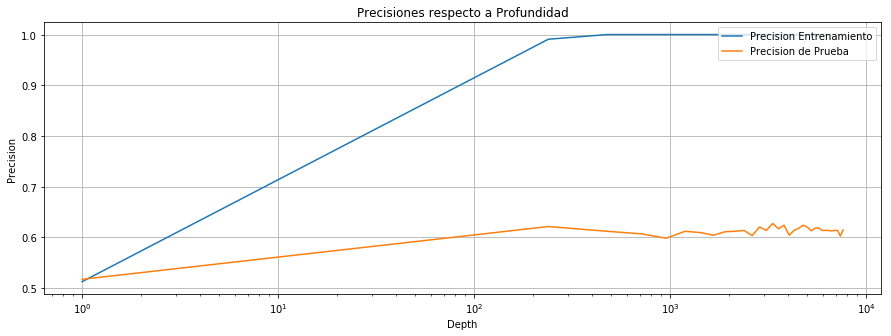

In [24]:
from sklearn.tree import DecisionTreeClassifier as Tree
def do_Tree(x,y,xv,yv, param_d=None, param_m=2):
    model= Tree()
    #print("Param Max-D= ",param_d, 'Min-samples-S= ', param_m)
    model.set_params(max_depth=param_d, min_samples_split=param_m) 
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Depths = np.arange(1, features_train.shape[1], 238) #choose steps
SamplesS = np.arange(2, features_train.shape[0] , 238 ) #choose steps
ParamC =list()
TrainAcc = list()
TestAcc = list()
for i in Depths:
    model, train_acc, test_acc = do_Tree(features_train,labels_train,features_val,labels_val, param_d=i)
    #print("train_acc: ",train_acc)
    #print("test_acc: ",test_acc)
    ParamC.append(i)
    TrainAcc.append(train_acc)
    TestAcc.append(test_acc)
plt.figure(figsize=(15,5))
plt.plot(ParamC, TrainAcc,label="Precision Entrenamiento")
plt.plot(ParamC, TestAcc, label="Precision de Prueba")
plt.xscale('log')
plt.title('Precisiones respecto a Profundidad')
plt.legend(loc='upper right')
plt.ylabel("Precision")
plt.xlabel("Depth")
plt.grid()
plt.show()

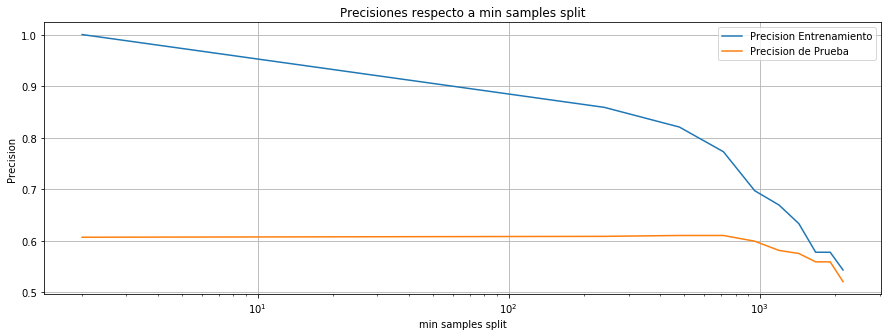

In [25]:
ParamC =list()
TrainAcc = list()
TestAcc = list()
for i in SamplesS:
    model, train_acc, test_acc = do_Tree(features_train,labels_train,features_val,labels_val, param_m=i)
    #print("train_acc: ",train_acc)
    #print("test_acc: ",test_acc)
    ParamC.append(i)
    TrainAcc.append(train_acc)
    TestAcc.append(test_acc)
plt.figure(figsize=(15,5))
plt.plot(ParamC, TrainAcc,label="Precision Entrenamiento")
plt.plot(ParamC, TestAcc, label="Precision de Prueba")
plt.xscale('log')
plt.title('Precisiones respecto a min samples split')
plt.legend(loc='upper right')
plt.ylabel("Precision")
plt.xlabel("min samples split")
plt.grid()
plt.show()

Variando la profundidad máxima del árbol se observa que llega a precisión 1 en el conjunto de entrenamiento y en el conjunto de pruebas supera levemente el 0.6, donde comienza a tener fluctuaciones su precisión. En el caso de la mínima diviones de la muestra, hasta casi el valor 1000 se muestra constante en el conjunto de prueba, mientras que en el de entrenamiento disminuye constantemente.

j) Utilice una Red Neuronal Artificial (ANN) para intentar resolver el problema, como la que se señala a continuación (utilizando el framework de *keras*): entrenada por 25 iteraciones al dataset (*epochs*) con un tamaño de *batch* de 128 para las actualizaciones de los pesos, utilizando *SGD* con una tasa de aprendizaje $0.1$ sobre la función de pérdida binaria de clasificación. La arquitectura de la red contiene una capa de salida con una única neurona que indica la probabilidad de que el texto sea positivo, una capa escondida con número de neuronas $N_h$ y la capa de entrada implícita para $x$. Varíe el parámetro que corresponde al número de neuronas en la capa oculta $N_h$, en potencias de 2, y vuelva a realizar el gráfico de error con respecto al parámetro. Comente.

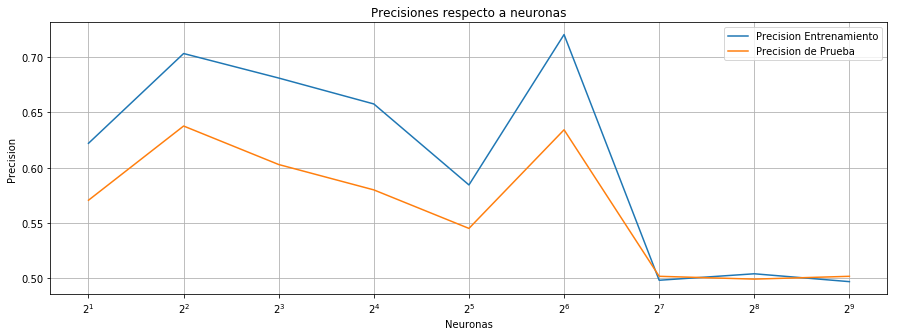

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
def do_ANN(x,y, xv,yv, param):
    #print("Neuron hidden = ",param)
    model = Sequential()
    model.add(Dense(units=param, input_dim=x.shape[1], activation="sigmoid"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x, y, epochs=25, batch_size=128, verbose=0)
    train_acc = model.evaluate(x,y, verbose=0)[1] #in position 0 is the loss
    test_acc = model.evaluate(xv,yv, verbose=0)[1]
    return model, train_acc, test_acc
N_h = [2**i for i in range(1,10)]
ParamC =list()
TrainAcc = list()
TestAcc = list()
for i in N_h:
    model, train_acc, test_acc = do_ANN(features_train,labels_train,features_val,labels_val, param=i)
    #print("train_acc: ",train_acc)
    #print("test_acc: ",test_acc)
    ParamC.append(i)
    TrainAcc.append(train_acc)
    TestAcc.append(test_acc)
plt.figure(figsize=(15,5))
plt.plot(ParamC, TrainAcc,label="Precision Entrenamiento")
plt.plot(ParamC, TestAcc, label="Precision de Prueba")
plt.xscale('log',basex=2)
plt.title('Precisiones respecto a neuronas')
plt.legend(loc='upper right')
plt.ylabel("Precision")
plt.xlabel("Neuronas")
plt.grid()
plt.show()

k) Ahora evalúe sobre el conjunto de pruebas el mejor modelo obtenido, seleccionado en base a la métrica de desempeño en el conjunto de validación. Comente sobre la calidad obtenida en el problema trabajado ¿Es un buen valor? ¿Cuál podría ser un valor de referencia?

In [91]:
import statistics
te_acc=list()
desv=list()
acc=list()
mejor_aux=0
mejor=list()
for i in Cs:
    model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param= i)
    acc.append(test_acc)
    if test_acc>=mejor_aux:
         mejor_aux=test_acc
mejor.append(mejor_aux)
desv.append(statistics.stdev(acc))
te_acc.append(statistics.mean(acc))
#print("Regresión Logística")

C:\Users\gverg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [92]:
acc=list()
mejor_aux=0
for i in Cs:
    model, train_acc, test_acc = do_SVM(features_train,labels_train,features_val,labels_val, param=i)#linear
    acc.append(test_acc)
    if test_acc>=mejor_aux:
         mejor_aux=test_acc
mejor.append(mejor_aux)
desv.append(statistics.stdev(acc))
te_acc.append(statistics.mean(acc))
acc=list()
mejor_aux=0
for i in Cs:
    model, train_acc, test_acc = do_SVMr(features_train,labels_train,features_val,labels_val, param=i)#rbf
    acc.append(test_acc)
    if test_acc>=mejor_aux:
         mejor_aux=test_acc
mejor.append(mejor_aux)
desv.append(statistics.stdev(acc))
te_acc.append(statistics.mean(acc))
acc=list()
mejor_aux=0
for i in Cs:
    model, train_acc, test_acc = do_SVMp(features_train,labels_train,features_val,labels_val, param=i)#poly
    acc.append(test_acc)
    if test_acc>=mejor_aux:
         mejor_aux=test_acc
mejor.append(mejor_aux)
desv.append(statistics.stdev(acc))
te_acc.append(statistics.mean(acc))
#print("SVM")

In [93]:
acc=list()
mejor_aux=0
for i in Ks:
    model, train_acc, test_acc = do_KNN(features_train,labels_train,features_val,labels_val, param=i)
    acc.append(test_acc)
    if test_acc>=mejor_aux:
         mejor_aux=test_acc
mejor.append(mejor_aux)
desv.append(statistics.stdev(acc))
te_acc.append(statistics.mean(acc))
#print("KNN")

In [94]:
acc=list()
mejor_aux=0
for i in Depths:
    model, train_acc, test_acc = do_Tree(features_train,labels_train,features_val,labels_val, param_d=i)#variando max depth
    acc.append(test_acc)
    if test_acc>=mejor_aux:
         mejor_aux=test_acc
mejor.append(mejor_aux)
desv.append(statistics.stdev(acc))
te_acc.append(statistics.mean(acc))
acc=list()
mejor_aux=0
for i in SamplesS:
    model, train_acc, test_acc = do_Tree(features_train,labels_train,features_val,labels_val, param_m=i)#variando min sampless
    acc.append(test_acc)
    if test_acc>=mejor_aux:
         mejor_aux=test_acc
mejor.append(mejor_aux)
desv.append(statistics.stdev(acc))
te_acc.append(statistics.mean(acc))
#print("Arbol de Decisión")

In [95]:
acc=list()
mejor_aux=0
for i in N_h:
    model, train_acc, test_acc = do_ANN(features_train,labels_train,features_val,labels_val, param=i)
    acc.append(test_acc)
    if test_acc>=mejor_aux:
         mejor_aux=test_acc
mejor.append(mejor_aux)
desv.append(statistics.stdev(acc))
te_acc.append(statistics.mean(acc))
#print("Red neuronal")

In [107]:
print("Modelo:\t\t\t Accuracy promedio: Desviación estándar: Max accuracy alcanzada:")
print("Regresion logística\t",te_acc[0],desv[0],mejor[0])
print("SVM: kernel linear\t",te_acc[1],desv[1],mejor[1])
print("SVM: kernel rbf\t\t",te_acc[2],desv[2],mejor[2])
print("SVM: kernel polynomial\t",te_acc[3],desv[3],mejor[3])
print("KNN\t\t\t",te_acc[4],desv[4],mejor[4])
print("Tree: varía Depths\t",te_acc[5],desv[5],mejor[5])
print("Tree: varía SamplesS\t",te_acc[6],desv[6],mejor[6])
print("Red neuronal\t\t",te_acc[7],desv[7],mejor[7])

Modelo:			 Accuracy promedio: Desviación estándar: Max accuracy alcanzada:
Regresion logística	 0.6917092924126172 0.026299725017552945 0.7152600170502984
SVM: kernel linear	 0.5062872975277067 0.02140007735048802 0.5592497868712702
SVM: kernel rbf		 0.5703324808184143 0.09932439086745251 0.7067348678601876
SVM: kernel polynomial	 0.5062872975277067 0.02140007735048802 0.5592497868712702
KNN			 0.5377593066211992 0.029649427191157596 0.6069906223358909
Tree: varía Depths	 0.6091089927407063 0.017845788199291883 0.629156010230179
Tree: varía SamplesS	 0.5859335038363171 0.03306187733334775 0.6283034953111679
Red neuronal		 0.5746897790167067 0.058371523599307584 0.6419437527656555


Observando el desempeño de los modelos en cuanto a precisión, a simple vista Regresión logística es el que tiene mejor desempeño al tener mejor precisión en general, por su promedio, su pequeña desviación estandar y su máximo alcanzado. En general el desempeño de la mayoría están en una precisión promedio de 0.6, indicando una mejora sobre el azar de 0.5. Aún así como se observa, hay casos donde el máximo está cerca de 0.7 ya que dependen mucho del valor de la variable que uno modificó al probar varios valores (C, K, profundidad, etc). Y por ello también hay desviaciones más significativas que con mayor valor.

l) Para comparar sus resultados utilice el modelo VADER (*Valence Aware Dictionary and sEntiment Reasoner*) [[6]](#refs), el cual entrega una *score* de predicción a nivel léxico (de palabras que comúnmente se asocian a una orientiación positiva o negativa). Este modelo construido manualmente no requiere entrenamiento, por lo que solo debe evaluar en conjunto de pruebas realizando predicciones del texto bruto (sin pre-procesamiento). Comente.


In [45]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
def vader_predict(sentences): 
    sid_obj = SentimentIntensityAnalyzer() 
    sent_v = []
    for text in sentences:
        sentiment_dict = sid_obj.polarity_scores(text) 
        if sentiment_dict["pos"] > sentiment_dict["neg"]: #based on scores
            sent_v.append(1)
        else:
            sent_v.append(0)
    return np.asarray(sent_v)
vader_pred_test = vader_predict(df_test_text) 
from sklearn.metrics import accuracy_score
accuracy_score(labels_test, vader_pred_test)

0.6359032076533483

Con un score de 0.636, este modelo que asocia palabras con una orientacion, tiene mejor resultado que otros modelos vistos como del arbol y K-nn, aunque abajo de Logistic Regression y SVM. Aún así el modelo está cerca del azar (recordar que cerca de la mitad son de una clase), pero es mejor ya que palabras positivas suelen usarse para dar una opinion positiva a no ser que se usa para engrandecer una opinión negativa (ejemplo, Esta maravillosa basura...), por lo que las palabras usadas no son suficiente.

m) Bajo la idea del modelo VADER realice un análisis de qué palabras su modelo tiende a considerar como positivas o negativas por si solas. Algunos de los modelos estudiados en esta sección realizan una predicción probabilista, utilice uno de éstos para verificar lo solicitado. Sobre la representación *TF* genere datos de entradas que contengan una sola palabra del vocabulario para evaluar que predicción les genera su modelo a esas palabras. Muestre las palabras más negativas y positivas en el vocabulario consideradas por su modelo. Comente.

In [238]:
V = len(vocab)
d_w={}
word_scores = np.zeros((V, 2))
for i in range(V):
    x_word = np.zeros((1, V))
    x_word[:,i] = 1 # only the "i" word appeared
    word_scores[i] = model.predict_proba(x_word)
#vocab

In [254]:
#puntajes de las palabras
dict_w={}
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    #score = analyser.polarity_scores(sentence)
    #print("{:-<40} {}".format(sentence, str(score)))
    #print(score)
    dict_w[sentence]=analyser.polarity_scores(sentence)["compound"]
for i in vocab:
    sentiment_analyzer_scores(i)
wordd=list()
wordd2=list()
palabra=""
palabra2=""
aux=list()
c=10#cantidad de palabras a ver
for i in dict_w.keys():
    aux.append(i)
for j in range(c):
    menor=0.0
    mayor=0.0
    for i in aux:
        if dict_w[i]<menor:
            menor=dict_w[i]
            palabra=i
        if dict_w[i]>mayor:
            mayor=dict_w[i]
            palabra2=i
    if menor!=0.0:
        wordd.append(palabra)
        aux.remove(palabra)
    if mayor!=0.0:    
        wordd2.append(palabra2)
        aux.remove(palabra2) 
    
print("El top de palabras",c,"más positivas es: ")
for i in range(len(wordd2)):
    print(i+1,wordd2[i])

print("El top de palabras",c,"más negativas es: ")
for i in range(len(wordd)):
    print(i+1,wordd[i])

El top de palabras 10 más positivas es: 
1 sweetheart
2 best
3 freedom
4 greatest
5 love
6 lovingly
7 perfectly
8 awesome
9 great
10 masterpiece
El top de palabras 10 más negativas es: 
1 fu
2 kill
3 murder
4 hell
5 terrorism
6 killed
7 cancer
8 devil
9 killing
10 tragedy


Al ver las palabras más positivas y más negativas segun el score que tenían asignado es posible encontrarle sentido a la puntuación dado que las positivas corresponden a juicios de "admiración" mientras que las negativas son palabras que pueden considerarse violentas o que son usadas con intención de perjudicar. 

n) Intente mejorar los resultados de otra manera. Varíe el pre-procesamiento realizado a los datos en c), por ejemplo eliminar símbolos, números o aplicar la técnica de *stemmming* [[7]](#refs) en lugar de *lemmatization* para llevar a su tronco léxico.

In [73]:
from nltk.stem.porter import PorterStemmer
wordstemmer = PorterStemmer()
wordstemmer.stem(word)

NameError: name 'word' is not defined

o) Varíe la representación utilizada actualmente por alguna otra que ayude a mejorar el desempeño, por ejemplo reducir el peso de una palabra si es que aparece en muchos textos: TF-IDF. Existen varias opciones que podría realizar para mejorar el desempeño, por ejemplo reducir el vocabulario a las $K$ palabras más frecuentes, eliminar las palabras menos frecuentes, normalizar la representación, utilizar *n-gramas*, entre otras.

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer(binary=False, ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, norm='l2', use_idf=True, sublinear_tf=False)
tfidf_model.fit(texts_train)
tfidf_model.transform(texts_train)

... #for val and test
tfidf_model

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [72]:
tfidf_model = TfidfVectorizer(binary=False, ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, norm='l2', use_idf=True, sublinear_tf=False)
tfidf_model.fit(texts_val)
tfidf_model.transform(texts_val)

<1173x5129 sparse matrix of type '<class 'numpy.float64'>'
	with 12543 stored elements in Compressed Sparse Row format>

In [69]:
tfidf_model = TfidfVectorizer(binary=False, ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, norm='l2', use_idf=True, sublinear_tf=False)
tfidf_model.fit(texts_test)
tfidf_model.transform(texts_test)

<3554x9818 sparse matrix of type '<class 'numpy.float64'>'
	with 38758 stored elements in Compressed Sparse Row format>

p) Utilice métricas auxiliares para entender en qué falla su mejor modelo obtenido hasta el momento. ¿La información entregada indica cómo se podría mejorar o cual sería la causa de la falla?

In [233]:
from sklearn.metrics import classification_report
def score_the_model(model, x, y):
    print("Detailed Analysis Testing Results ...")
    print(classification_report(y, model.predict(x), target_names=['-','+']))
    
#LogisticRegresion con C=10
model= LogisticRegression()
model.set_params(C=10)
model.fit(features_train,labels_train)
score_the_model(model, features_test, labels_test )

Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.72      0.69      0.70      1803
           +       0.69      0.72      0.70      1751

   micro avg       0.70      0.70      0.70      3554
   macro avg       0.70      0.70      0.70      3554
weighted avg       0.70      0.70      0.70      3554



C:\Users\gverg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Siendo el mejor modelo el de "Logistic Regression" con C=10, la información que da el análisis es el detalle al clasificar una clase (negativa o positiva en este caso) en específico, dónde nuestro modelo clasifica mejor los negativos con precisión de 0.72 que positivos con precisión 0.69. En cambio sobre el recall, como se puede esperar los positivos tiene mejor desempeño que los negativos al clasificarlos, débido a que daría menos falsos negativos. En general por el f1-score se observa un desempeño de 0.70. Además de eso, no da información sobre como mejorar este modelo, porque es información efecto de la causa de C y modelo eligido, donde no se varió nada más.

q) Algo que se puede modificar en algunos modelos de aprendizaje es poner peso en cada una de las clases, por ejemplo si una clase es de mayor interés que las otras e interesa reducir más su error. En *sklearn* ésto puede ser realizado con el parámetro de *class_weights*. Por ejemplo, asigne que detectar los textos negativos me interesa 5 veces más que detectar los textos positivos. Comente.

In [234]:
print("5 a 1")
classes_weights = {0: 5, 1: 1} #or choose..
model.set_params(class_weight=classes_weights)
model.fit(features_train, labels_train)
score_the_model(model, features_test, labels_test)

print("25 a 1")
classes_weights = {0: 25, 1: 1} #or choose..
model.set_params(class_weight=classes_weights)
model.fit(features_train, labels_train)
score_the_model(model, features_test, labels_test)

print("100 a 1")
classes_weights = {0: 100, 1: 1} #or choose..
model.set_params(class_weight=classes_weights)
model.fit(features_train, labels_train)
score_the_model(model, features_test, labels_test)

print("10000 a 1")
classes_weights = {0: 10000, 1: 1} #or choose..
model.set_params(class_weight=classes_weights)
model.fit(features_train, labels_train)
score_the_model(model, features_test, labels_test)

5 a 1
Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.67      0.78      0.72      1803
           +       0.73      0.60      0.66      1751

   micro avg       0.69      0.69      0.69      3554
   macro avg       0.70      0.69      0.69      3554
weighted avg       0.70      0.69      0.69      3554

25 a 1
Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.64      0.83      0.72      1803
           +       0.75      0.52      0.61      1751

   micro avg       0.68      0.68      0.68      3554
   macro avg       0.69      0.68      0.67      3554
weighted avg       0.69      0.68      0.67      3554

100 a 1
Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.63      0.86      0.72      1803
           +       0.76      0.48      0.59      1751

   micro avg       0.67      0.67      0.67    

C:\Users\gverg\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Habiendo agregado más peso a la clase negativa, se probó con 3 diferentes (5 a 1, 25 a 1 y 100 a 1). En los tres se nota que los valores de los medidas de desempeño variaron entre ellos y sobretodo en comparación al anterior de pesos iguales. Al agregar que interesa más los negativos se ve un aumento en el desempeño general al clasificar opiniones negativos con un f1-score de 0.72 (un score entre precision y recall), pero al mismo disminución de su precisión con aumento de su recall. Esto significa que siendo más importante los negativos, el modelo genera más falsos positivos (clasificando opiniones negativas) disminuyendo su precisión pero aumenta su recall ya que disminuye los falsos negativos. Por último, yendo al extremo de 10000 a 1 se observa que recall llegá al valor 1, debido que todo texto lo clasifica como clase negativa y no genera falsos negativos, y su precisión se va a 0.51, que sería la cantidad la fraccion entre entre opiniones negativas sobre el total (y por eso tambien clasificar opiniones positivas tiene scores 0).

r) Visualice la clasificación que realiza su mejor modelo sobre algunos textos de pruebas ¿Qué entega mas información, una predicción categórica o una continua? ¿Cuál podría ser el beneficio de una o de otra? Comente

In [256]:
test_pred = model.predict_proba(features_test) #or ".predict"
spl = np.random.randint( 0, len(test_pred), size=15)
for text, pred_s, true_s in zip(df_test_text[spl], test_pred[spl], labels_test[spl]):
    print("True sent: ", true_s, "-- Pred sent: ",pred_s)
    print("Raw text: ", text)

True sent:  0.0 -- Pred sent:  [9.99883397e-01 1.16603169e-04]
Raw text:  howard and his co-stars all give committed performances , but they're often undone by howard's self-conscious attempts to find a 'literary' filmmaking style to match his subject .

True sent:  0.0 -- Pred sent:  [9.99828154e-01 1.71846328e-04]
Raw text:  the film itself is about something very interesting and odd that would probably work better as a real documentary without the insinuation of mediocre acting or a fairly trite narrative .

True sent:  0.0 -- Pred sent:  [9.99840282e-01 1.59718478e-04]
Raw text:  made by jackasses for jackasses .

True sent:  0.0 -- Pred sent:  [9.99464002e-01 5.35998089e-04]
Raw text:  while some of the camera work is interesting , the film's mid-to-low budget is betrayed by the surprisingly shoddy makeup work .

True sent:  1.0 -- Pred sent:  [9.99184622e-01 8.15377973e-04]
Raw text:  graham greene's novel of colonialism and empire is elevated by michael caine's performance as a 

s) Comente sobre el desempeño obtenido por los diferentes modelos de aprendizaje utilizados al enfrentar el problema, ¿Dónde pareciera estar la mejora? ¿En la variación de los modelos y sus parámetros o en la modificación de la representación? ¿Cuál modelo de aprendizaje le parece mejor en base a su criterio? ya sea desempeño, tiempo de ejecución comodidad en las decisiones involucradas, etc.

## 2. Problema de Múltiples Anotacione

In [64]:
import pandas as pd
df = pd.read_csv("./sentiment_polarity/mturk_answers.csv")


In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

NameError: name 'y_true' is not defined

In [106]:
EMBEDDING_DIM = 50   #50 100 200 300
GLOVE_FILE = "./glove.6B.%dd.txt"%(EMBEDDING_DIM)
embeddings_index = {}
with open(GLOVE_FILE,encoding="utf8") as file:
    for line in file:
        values = line.split()
        embeddings_index[values[0]] = np.asarray(values[1:], dtype='float32')
...
embeddings_index.get(word)

array([-0.1643   ,  0.15722  , -0.55021  , -0.3303   ,  0.66463  ,
       -0.1152   , -0.2261   , -0.23674  , -0.86119  ,  0.24319  ,
        0.074499 ,  0.61081  ,  0.73683  , -0.35224  ,  0.61346  ,
        0.0050975, -0.62538  , -0.0050458,  0.18392  , -0.12214  ,
       -0.65973  , -0.30673  ,  0.35038  ,  0.75805  ,  1.0183   ,
       -1.7424   , -1.4277   ,  0.38032  ,  0.37713  , -0.74941  ,
        2.9401   , -0.8097   , -0.66901  ,  0.23123  , -0.073194 ,
       -0.13624  ,  0.24424  , -1.0129   , -0.24919  , -0.06893  ,
        0.70231  , -0.022177 , -0.64684  ,  0.59599  ,  0.027092 ,
        0.11203  ,  0.61214  ,  0.74339  ,  0.23572  , -0.1369   ],
      dtype=float32)